In [2]:
import keras
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
# Загрузка
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

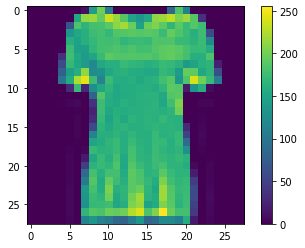

In [4]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# Normalize the images
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [7]:
# Build the model.
model = Sequential([
  Dense(256, activation='relu', input_shape=(784,)),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [8]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [9]:
%%time
# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=20,
  batch_size=100,
)

Epoch 1/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.5014 - accuracy: 0.8164
Epoch 2/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.3681 - accuracy: 0.8643
Epoch 3/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.3310 - accuracy: 0.8772
Epoch 4/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.3050 - accuracy: 0.8871
Epoch 5/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.2858 - accuracy: 0.8939
Epoch 6/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.2722 - accuracy: 0.8975
Epoch 7/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.2556 - accuracy: 0.9036
Epoch 8/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.2459 - accuracy: 0.9068
Epoch 9/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.2306 - accuracy: 0.9135
Epoch 10/20
60000/60000 [==============================

In [10]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

10000/10000 [==============================] - 0s 25us/step


[0.3771816090643406, 0.8842999935150146]

In [11]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:20])

# Print our model's predictions.
print(np.argmax(predictions, axis=1))

# Check our predictions against the ground truths.
print(test_labels[:20])

[9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


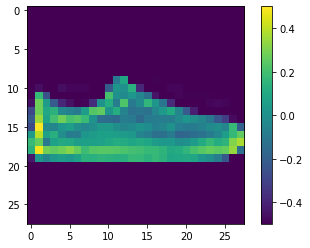

In [12]:
plt.figure()
plt.imshow(test_images[12].reshape(-1,28))

plt.colorbar()
plt.grid(False)
plt.show()
plt.show()